<a href="https://colab.research.google.com/github/mounibwassim/blank-app/blob/main/Activity_Integrating_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# *   Setting up your environment

Before we begin, ensure that you have the necessary libraries installed. If you haven’t already installed them, use the following command to install the required packages:











In [1]:
pip install numpy pandas scikit-learn matplotlib

# **Importing required libraries**
Start by importing the libraries you’ll need for this lab:

In [2]:
#  Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# **Loading and preparing the data**
For this example, we’ll use a simple dataset where we aim to predict house prices based on the square footage of the house. You can use your own dataset or create a synthetic one for this lab.

In [3]:
# Sample dataset (house prices based on square footage)
data = {
    'SquareFootage': [1500, 1800, 2400, 3000, 3500, 4000, 4500],
    'Price': [200000, 250000, 300000, 350000, 400000, 500000, 600000]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the data
print(df.head())

   SquareFootage   Price
0           1500  200000
1           1800  250000
2           2400  300000
3           3000  350000
4           3500  400000


# **Splitting the data into training and testing sets**
We will split the dataset into training and testing sets. This allows us to train the model on one part of the data and test it on the unseen data to evaluate its performance.

In [4]:
# Features (X) and Target (y)
X = df[['SquareFootage']]  # Feature(s)
y = df['Price']            # Target variable

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

Training data: (5, 1), (5,)
Testing data: (2, 1), (2,)


***Training the linear regression model***
Now we’ll create a linear regression model and train it using the training data:

In [5]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Display the learned coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: -68611.5214180206
Coefficient: 143.2791728212703


The intercept and coefficient are the parameters that define the linear equation y=mx+b, where:


*   m is the coefficient (slope), and
*   b is the intercept (y-axis intercept).

# **Making predictions**
With the model trained, we can now use it to make predictions on the test data.

In [6]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Display the predictions
print("Predicted Prices:", y_pred)
print("Actual Prices:", y_test.values)

Predicted Prices: [146307.23781388 189290.98966027]
Actual Prices: [200000 250000]


# **Evaluating the model**
It’s important to evaluate the model to see how well it performed on the test data. We’ll use mean squared error (MSE) and R-squared (R²) as performance metrics:



*   MSE gives the average squared difference between the actual and predicted values (the lower, the better).
*   R² tells you how well the model fits the data (1 means a perfect fit, while 0 indicates no fit).





In [7]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3284248323.802326
R-squared: -4.254797318083722


# ***Visualizing the results***

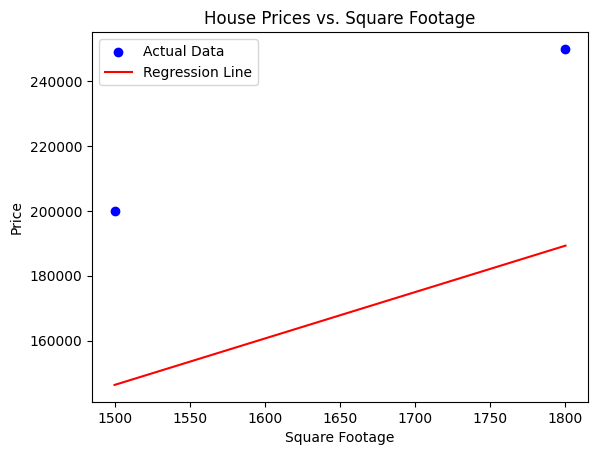

In [8]:
# Plot the data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('House Prices vs. Square Footage')
plt.legend()

# Show the plot
plt.show()